In [341]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [342]:
submission=pd.read_csv("sample_submission.csv")
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [343]:
train.head()

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,2,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,3,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,4,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,5,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000


In [344]:
train.shape

(1350, 15)

In [345]:
'''OverallQual : 전반적 재료와 마감 품질
YearBuilt : 완공 연도
YearRemodAdd : 리모델링 연도
ExterQual : 외관 재료 품질
BsmtQual : 지하실 높이
TotalBsmtSF : 지하실 면적 
1stFlrSF : 1층 면적 
GrLivArea : 지상층 생활 면적
FullBath : 지상층 화장실 개수 
KitchenQual : 부억 품질 
GarageYrBlt : 차고 완공 연도
GarageCars: 차고 자리 개수
GarageArea: 차고 면적 
target : 집값(달러 단위)'''



'OverallQual : 전반적 재료와 마감 품질\nYearBuilt : 완공 연도\nYearRemodAdd : 리모델링 연도\nExterQual : 외관 재료 품질\nBsmtQual : 지하실 높이\nTotalBsmtSF : 지하실 면적 \n1stFlrSF : 1층 면적 \nGrLivArea : 지상층 생활 면적\nFullBath : 지상층 화장실 개수 \nKitchenQual : 부억 품질 \nGarageYrBlt : 차고 완공 연도\nGarageCars: 차고 자리 개수\nGarageArea: 차고 면적 \ntarget : 집값(달러 단위)'

In [346]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1350 non-null   int64 
 1   Overall Qual    1350 non-null   int64 
 2   Gr Liv Area     1350 non-null   int64 
 3   Exter Qual      1350 non-null   object
 4   Garage Cars     1350 non-null   int64 
 5   Garage Area     1350 non-null   int64 
 6   Kitchen Qual    1350 non-null   object
 7   Total Bsmt SF   1350 non-null   int64 
 8   1st Flr SF      1350 non-null   int64 
 9   Bsmt Qual       1350 non-null   object
 10  Full Bath       1350 non-null   int64 
 11  Year Built      1350 non-null   int64 
 12  Year Remod/Add  1350 non-null   int64 
 13  Garage Yr Blt   1350 non-null   int64 
 14  target          1350 non-null   int64 
dtypes: int64(12), object(3)
memory usage: 158.3+ KB


In [347]:
train=train.drop('id',axis=1)

In [348]:
X_train=train.drop("target",axis=1)
y_train=train['target']

In [349]:
X_train

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt
0,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003
1,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006
2,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967
3,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000
4,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,6,1756,Gd,2,422,TA,872,888,Ex,2,1996,1997,1996
1346,9,2748,Gd,3,850,Ex,1850,1850,Ex,2,2006,2006,2006
1347,5,1214,TA,1,318,TA,1214,1214,TA,2,1967,1967,1967
1348,5,894,TA,2,440,TA,864,894,Gd,1,1974,1974,1974


In [350]:
X_train

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt
0,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003
1,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006
2,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967
3,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000
4,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,6,1756,Gd,2,422,TA,872,888,Ex,2,1996,1997,1996
1346,9,2748,Gd,3,850,Ex,1850,1850,Ex,2,2006,2006,2006
1347,5,1214,TA,1,318,TA,1214,1214,TA,2,1967,1967,1967
1348,5,894,TA,2,440,TA,864,894,Gd,1,1974,1974,1974


In [351]:
numeric_feature=train.columns[(train.dtypes==np.int64)]
category_feature=train.columns[(train.dtypes==object)]

In [352]:
numeric_feature

Index(['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area',
       'Total Bsmt SF', '1st Flr SF', 'Full Bath', 'Year Built',
       'Year Remod/Add', 'Garage Yr Blt', 'target'],
      dtype='object')

In [353]:
numeric_train=train[numeric_feature]
category_train=train[category_feature]

In [354]:
numeric_train.corr()

,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
Overall Qual,1.000000,0.588243,0.571066,0.517218,0.509058,0.476398,0.554248,0.582875,0.579142,0.553927,0.810607
Gr Liv Area,0.588243,1.000000,0.516287,0.480863,0.419220,0.522535,0.612423,0.232281,0.315723,0.261861,0.742061
Garage Cars,0.571066,0.516287,1.000000,0.840054,0.466017,0.445017,0.513078,0.505803,0.433307,0.562320,0.634497
Garage Area,0.517218,0.480863,0.840054,1.000000,0.499634,0.485843,0.418852,0.445816,0.364369,0.536310,0.617151
Total Bsmt SF,0.509058,0.419220,0.466017,0.499634,1.000000,0.868811,0.367648,0.403767,0.265506,0.347908,0.664047
1st Flr SF,0.476398,0.522535,0.445017,0.485843,0.868811,1.000000,0.370299,0.290443,0.236692,0.259898,0.646843
Full Bath,0.554248,0.612423,0.513078,0.418852,0.367648,0.370299,1.000000,0.508745,0.472537,0.498692,0.554453
Year Built,0.582875,0.232281,0.505803,0.445816,0.403767,0.290443,0.508745,1.000000,0.616008,0.815615,0.546037
Year Remod/Add,0.579142,0.315723,0.433307,0.364369,0.265506,0.236692,0.472537,0.616008,1.000000,0.644251,0.529477
Garage Yr Blt,0.553927,0.261861,0.562320,0.536310,0.347908,0.259898,0.498692,0.815615,0.644251,1.000000,0.517973


In [355]:
plt.figure(figsize=(100,60))

<Figure size 7200x4320 with 0 Axes>

<Figure size 7200x4320 with 0 Axes>

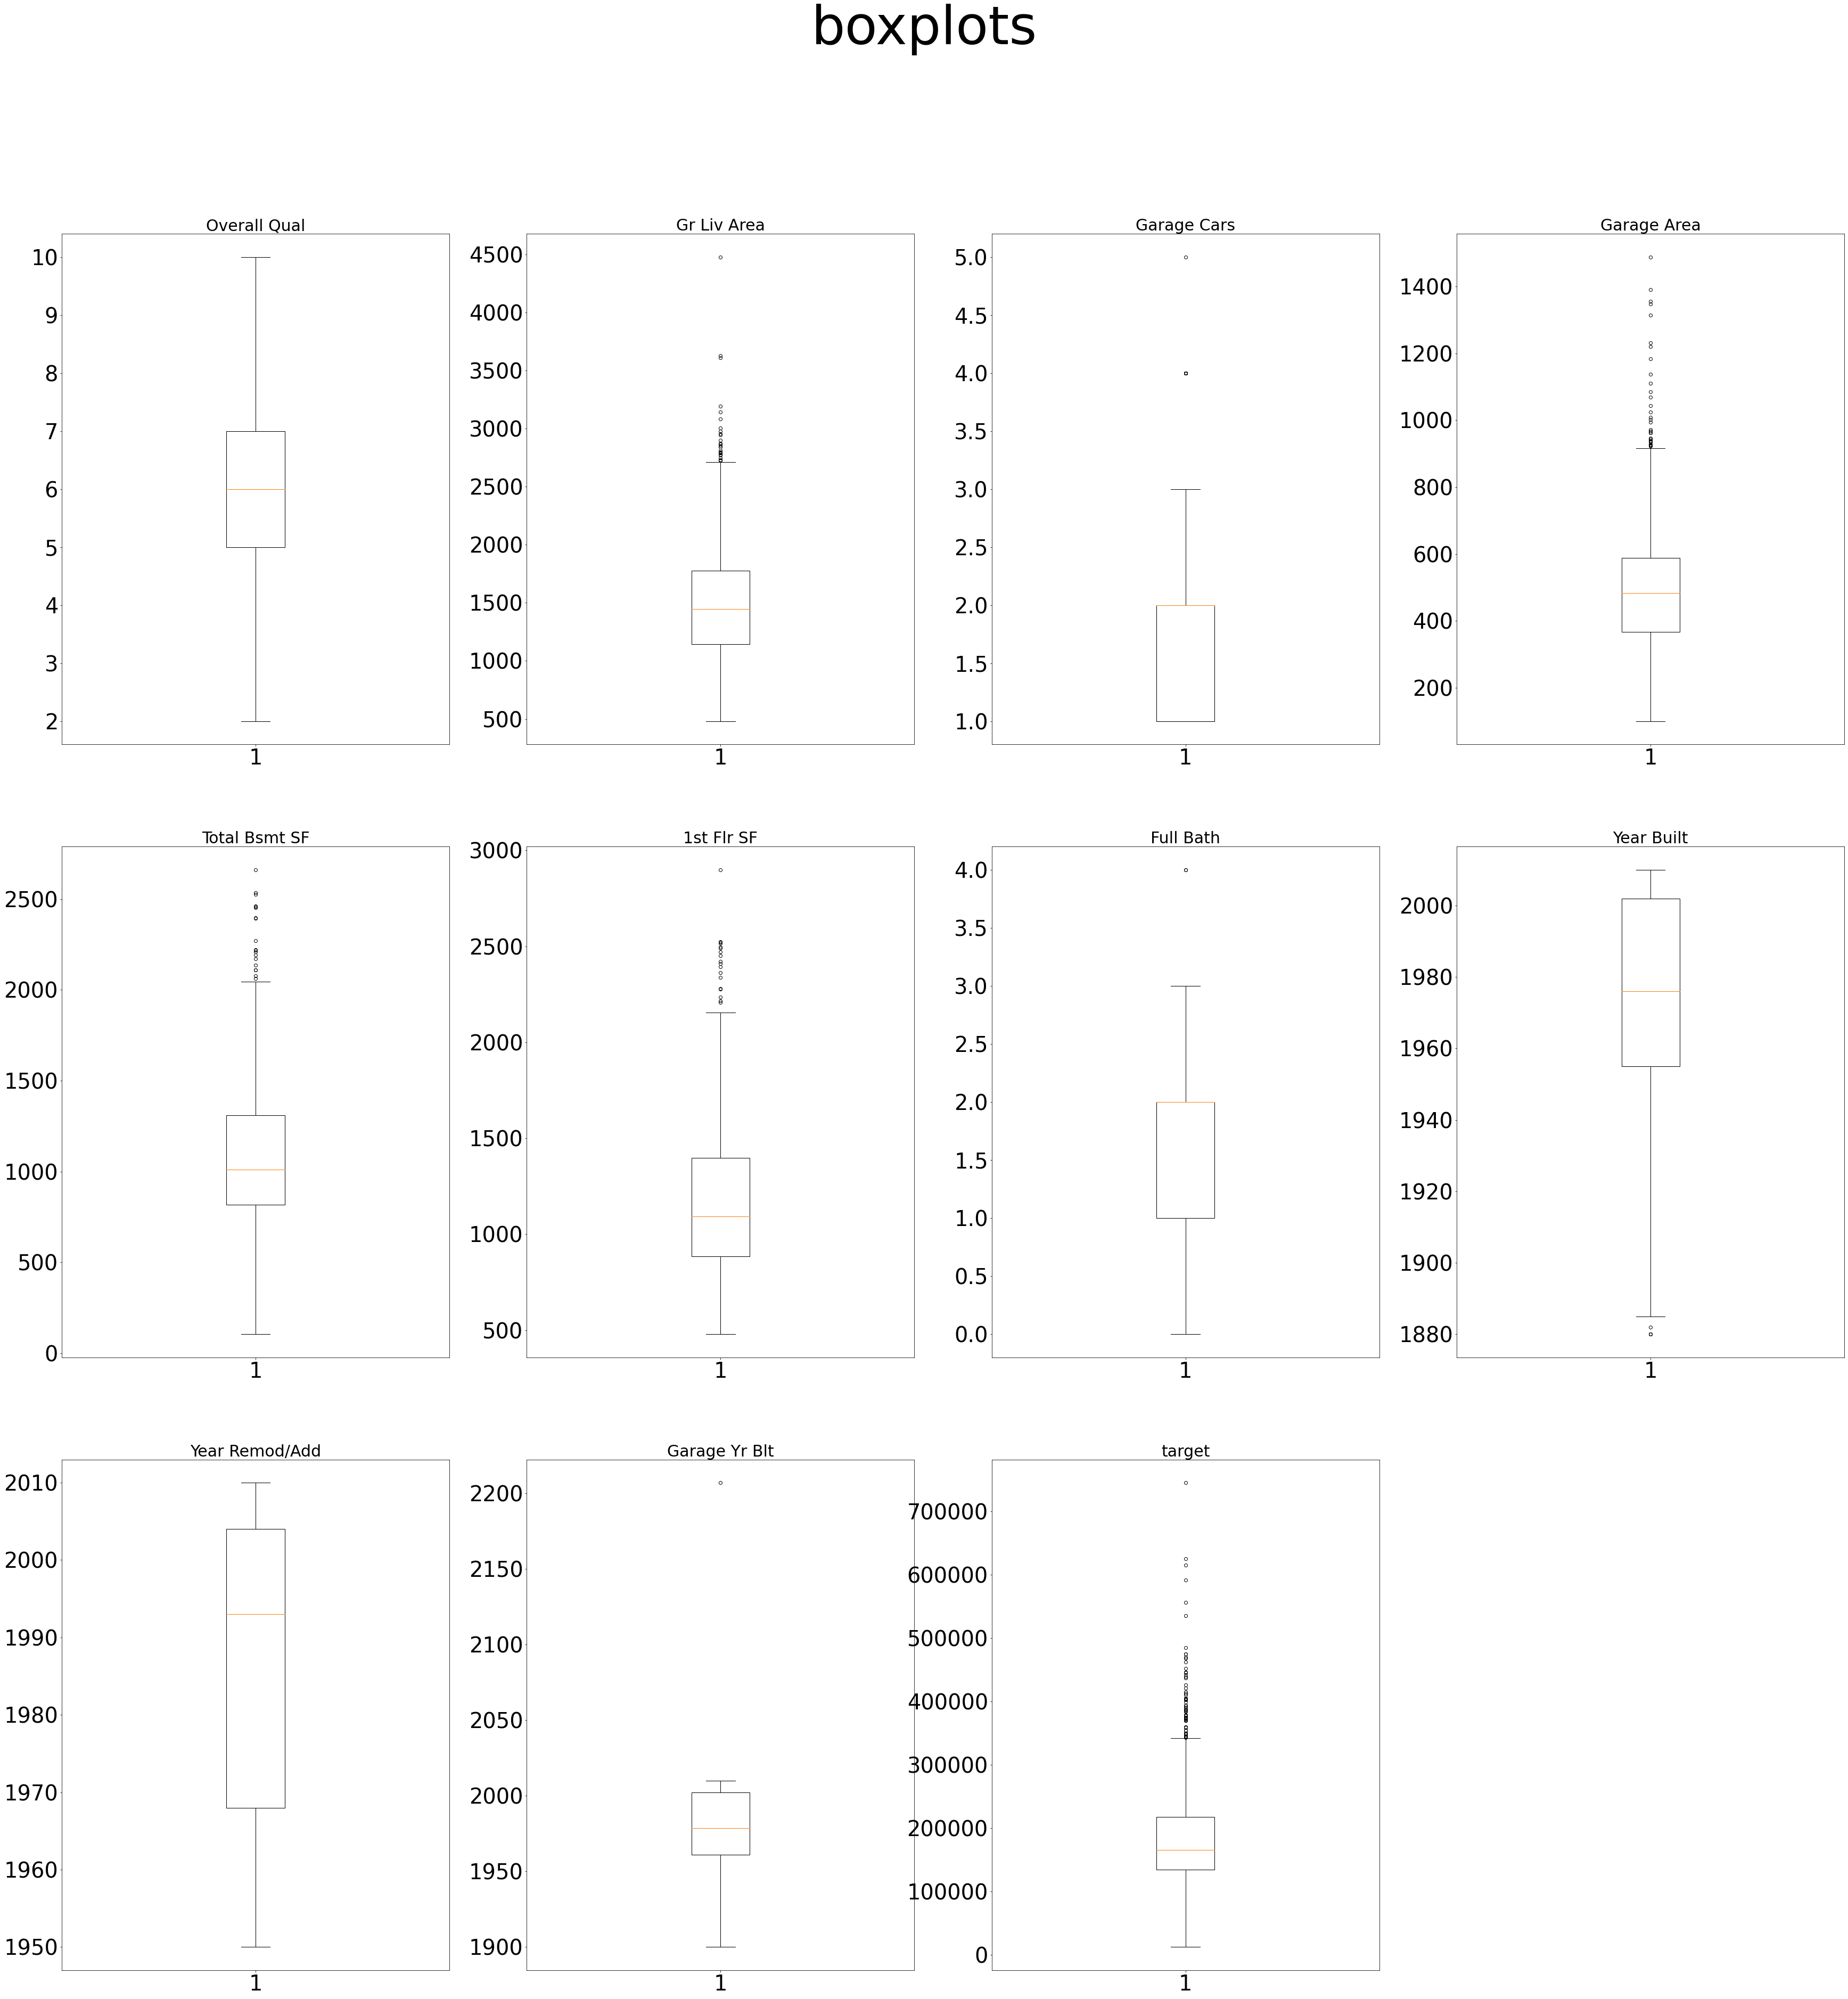

In [356]:
plt.figure(figsize=(60,60))
plt.suptitle('boxplots',fontsize=100)
for i in range(len(numeric_feature)):
    plt.subplot(3,4,i+1)
    plt.title(numeric_feature[i],fontsize=30)
    plt.boxplot(numeric_train[numeric_feature[i]])
    plt.figsize=(20,15)
    plt.tick_params(labelsize=40)

In [357]:
#outliers 이상치 제거
#iqr(1분위수와 3분위수 사이 차이)
#보통 q1-weight*iqr 부터 q3+weight*iqr 밖에 있는 값들을 이상치로 탐지

In [358]:
#set 집합을 이용해 중복 제거

In [359]:
category_train

,Exter Qual,Kitchen Qual,Bsmt Qual
0,Ex,Ex,Ex
1,Gd,Gd,Ex
2,TA,TA,TA
3,TA,Gd,TA
4,Gd,Gd,Gd
...,...,...,...
1345,Gd,TA,Ex
1346,Gd,Ex,Ex
1347,TA,TA,TA
1348,TA,TA,Gd


In [360]:
category_train['Kitchen Qual'].value_counts()

TA    660
Gd    560
Ex    107
Fa     23
Name: Kitchen Qual, dtype: int64

<AxesSubplot:>

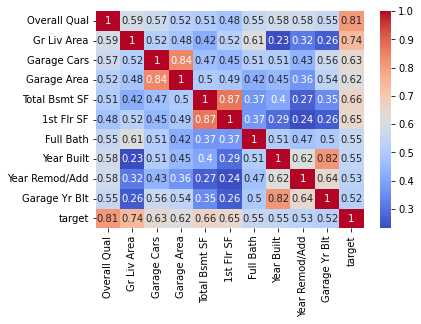

In [361]:
sns.heatmap(numeric_train.corr(),annot=True,cmap='coolwarm')

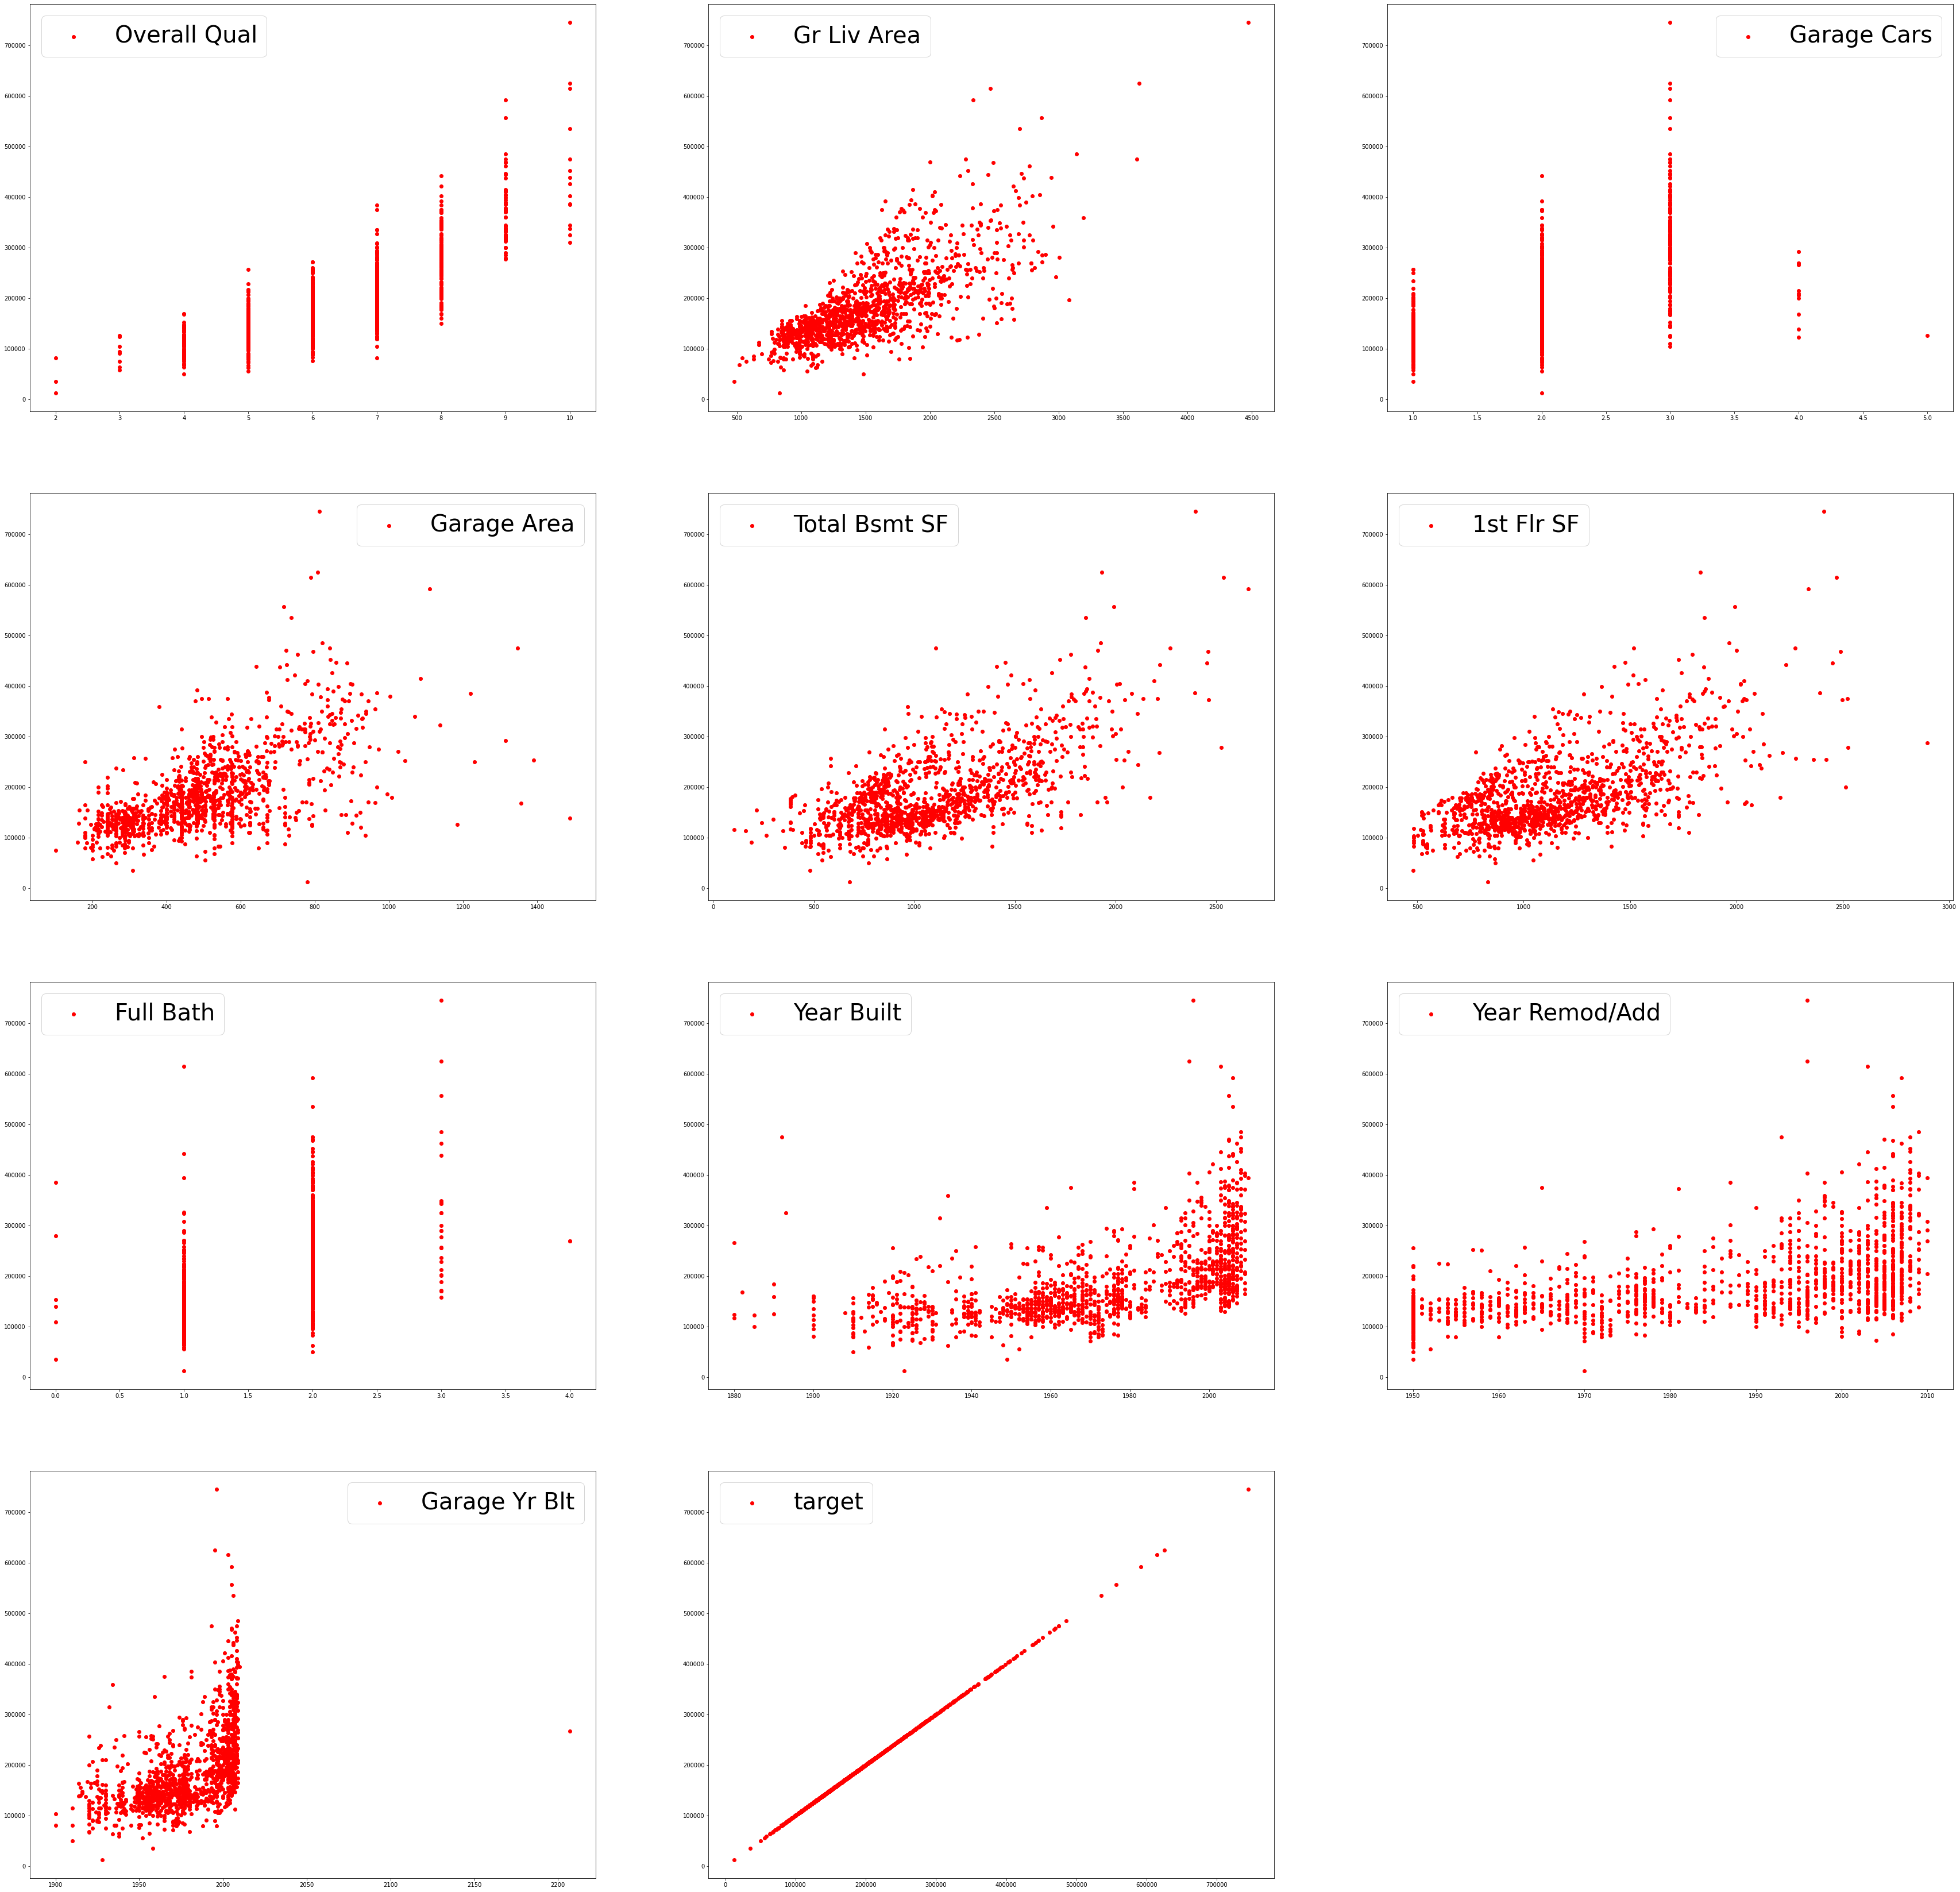

In [362]:
plt.figure(figsize=(60,60))
for i in range(len(numeric_feature)):
    plt.subplot(4,3,i+1)
    plt.scatter(numeric_train[numeric_feature[i]],numeric_train['target'],color='r',label=numeric_feature[i])
    plt.legend(fontsize=40)

In [363]:
train.isna().sum()

Overall Qual      0
Gr Liv Area       0
Exter Qual        0
Garage Cars       0
Garage Area       0
Kitchen Qual      0
Total Bsmt SF     0
1st Flr SF        0
Bsmt Qual         0
Full Bath         0
Year Built        0
Year Remod/Add    0
Garage Yr Blt     0
target            0
dtype: int64

In [364]:
#labelencoder은 순위 없음
#ordinalencoder 은 숫자 사이에 순위가 존재함
#ordinal 보단 map으로 간단하게 가능

In [365]:
train

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,6,1756,Gd,2,422,TA,872,888,Ex,2,1996,1997,1996,204000
1346,9,2748,Gd,3,850,Ex,1850,1850,Ex,2,2006,2006,2006,390000
1347,5,1214,TA,1,318,TA,1214,1214,TA,2,1967,1967,1967,143000
1348,5,894,TA,2,440,TA,864,894,Gd,1,1974,1974,1974,131000


In [366]:
train['Exter Qual'].value_counts()

TA    808
Gd    485
Ex     49
Fa      8
Name: Exter Qual, dtype: int64

In [367]:
#품질이 높을수록 높은값 지정

In [368]:
mapping={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}

In [369]:
X_train['Exter Qual']=X_train['Exter Qual'].map(mapping)
X_train['Kitchen Qual']=X_train['Kitchen Qual'].map(mapping)
X_train['Bsmt Qual']=X_train['Bsmt Qual'].map(mapping)

In [370]:
train

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,6,1756,Gd,2,422,TA,872,888,Ex,2,1996,1997,1996,204000
1346,9,2748,Gd,3,850,Ex,1850,1850,Ex,2,2006,2006,2006,390000
1347,5,1214,TA,1,318,TA,1214,1214,TA,2,1967,1967,1967,143000
1348,5,894,TA,2,440,TA,864,894,Gd,1,1974,1974,1974,131000


In [371]:
def get_outlier(df=None,column=None,weight=1.5):
    data=df[column]
    quantile_25=np.percentile(data.values,25)
    quantile_75=np.percentile(data.values,75)
    iqr=quantile_75-quantile_25
    w_iqr=weight*iqr
    lowest=quantile_25-w_iqr
    highest=quantile_75+w_iqr
    outlier_index=data[(data<lowest)|(data>highest)].index
    return outlier_index


In [372]:
index_list={}
for i,colname in enumerate(numeric_feature[:-1]):
    index_list[i]=get_outlier(train,colname)

In [373]:
index_list

{0: Int64Index([], dtype='int64'),
 1: Int64Index([  18,   94,  110,  132,  201,  297,  462,  476,  586,  663,  677,
              683,  686,  735,  747,  752,  816,  856,  864,  939,  941,  948,
              962, 1087, 1098, 1138, 1258, 1264, 1346],
            dtype='int64'),
 2: Int64Index([93, 297, 398, 503, 718, 735, 812, 939, 1010, 1163, 1173, 1228], dtype='int64'),
 3: Int64Index([   0,    4,   42,   90,  118,  242,  282,  297,  327,  377,  380,
              503,  511,  660,  664,  721,  732,  839,  859,  934,  973, 1002,
             1006, 1010, 1055, 1113, 1163, 1173, 1185, 1194, 1212, 1230, 1241,
             1251, 1259, 1298],
            dtype='int64'),
 4: Int64Index([   0,    7,  163,  263,  273,  327,  380,  628,  732,  745,  856,
              871,  942, 1002, 1034, 1101, 1221, 1298, 1311],
            dtype='int64'),
 5: Int64Index([   0,    7,  163,  263,  665,  732,  745,  811,  856,  871, 1002,
             1034, 1098, 1149, 1161, 1191, 1221, 1311],
            dt

In [374]:
final_list=[]
for i in range(len(index_list)):
    if list(index_list[i].values)==[]:
        continue
    for j in index_list[i].values:
        final_list.append(j)


#set 집합 이용해 중복 제거
final_list=set(final_list)

In [375]:
final_list

{0,
 4,
 7,
 18,
 42,
 90,
 93,
 94,
 110,
 118,
 132,
 163,
 201,
 242,
 254,
 263,
 273,
 282,
 286,
 297,
 327,
 377,
 380,
 398,
 462,
 476,
 503,
 511,
 586,
 628,
 660,
 663,
 664,
 665,
 677,
 683,
 686,
 718,
 721,
 732,
 735,
 745,
 747,
 752,
 811,
 812,
 816,
 839,
 856,
 859,
 864,
 871,
 888,
 934,
 939,
 940,
 941,
 942,
 948,
 962,
 973,
 1002,
 1006,
 1010,
 1034,
 1055,
 1087,
 1098,
 1101,
 1113,
 1138,
 1149,
 1161,
 1163,
 1173,
 1185,
 1191,
 1194,
 1212,
 1221,
 1228,
 1230,
 1241,
 1251,
 1258,
 1259,
 1264,
 1298,
 1311,
 1346}

In [376]:
for i in final_list:
    X_train.drop(i,axis=0,inplace=True)
    
for i in final_list:
    y_train.drop(i,axis=0,inplace=True)

In [377]:
X_train.shape

(1260, 13)

In [378]:
y_train.shape

(1260,)

<AxesSubplot:>

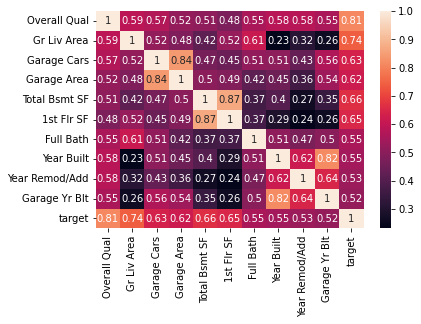

In [379]:
sns.heatmap(train.corr(),annot=True)

In [380]:
X_train

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt
1,7,1352,4,2,466,4,1352,1352,5,2,2006,2007,2006
2,5,900,3,1,288,3,864,900,3,1,1967,1967,1967
3,5,1174,3,2,576,4,680,680,3,1,1900,2006,2000
5,8,1968,4,3,680,5,774,774,5,2,2009,2010,2009
6,6,1478,3,2,442,3,1478,1478,3,1,1957,1957,1957
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,6,865,3,1,216,3,660,740,3,1,1920,1995,1920
1345,6,1756,4,2,422,3,872,888,5,2,1996,1997,1996
1347,5,1214,3,1,318,3,1214,1214,3,2,1967,1967,1967
1348,5,894,3,2,440,3,864,894,4,1,1974,1974,1974


In [381]:
'''OverallQual : 전반적 재료와 마감 품질
YearBuilt : 완공 연도
YearRemodAdd : 리모델링 연도
ExterQual : 외관 재료 품질
BsmtQual : 지하실 높이
TotalBsmtSF : 지하실 면적 
1stFlrSF : 1층 면적 
GrLivArea : 지상층 생활 면적
FullBath : 지상층 화장실 개수 
KitchenQual : 부억 품질 
GarageYrBlt : 차고 완공 연도
GarageCars: 차고 자리 개수
GarageArea: 차고 면적 
target : 집값(달러 단위)'''



'OverallQual : 전반적 재료와 마감 품질\nYearBuilt : 완공 연도\nYearRemodAdd : 리모델링 연도\nExterQual : 외관 재료 품질\nBsmtQual : 지하실 높이\nTotalBsmtSF : 지하실 면적 \n1stFlrSF : 1층 면적 \nGrLivArea : 지상층 생활 면적\nFullBath : 지상층 화장실 개수 \nKitchenQual : 부억 품질 \nGarageYrBlt : 차고 완공 연도\nGarageCars: 차고 자리 개수\nGarageArea: 차고 면적 \ntarget : 집값(달러 단위)'

In [382]:
X_train.shape

(1260, 13)

In [383]:
y_train.shape

(1260,)

In [384]:
X_train

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt
1,7,1352,4,2,466,4,1352,1352,5,2,2006,2007,2006
2,5,900,3,1,288,3,864,900,3,1,1967,1967,1967
3,5,1174,3,2,576,4,680,680,3,1,1900,2006,2000
5,8,1968,4,3,680,5,774,774,5,2,2009,2010,2009
6,6,1478,3,2,442,3,1478,1478,3,1,1957,1957,1957
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,6,865,3,1,216,3,660,740,3,1,1920,1995,1920
1345,6,1756,4,2,422,3,872,888,5,2,1996,1997,1996
1347,5,1214,3,1,318,3,1214,1214,3,2,1967,1967,1967
1348,5,894,3,2,440,3,864,894,4,1,1974,1974,1974


In [385]:
numeric_feature

Index(['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area',
       'Total Bsmt SF', '1st Flr SF', 'Full Bath', 'Year Built',
       'Year Remod/Add', 'Garage Yr Blt', 'target'],
      dtype='object')

In [386]:
X_train

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt
1,7,1352,4,2,466,4,1352,1352,5,2,2006,2007,2006
2,5,900,3,1,288,3,864,900,3,1,1967,1967,1967
3,5,1174,3,2,576,4,680,680,3,1,1900,2006,2000
5,8,1968,4,3,680,5,774,774,5,2,2009,2010,2009
6,6,1478,3,2,442,3,1478,1478,3,1,1957,1957,1957
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,6,865,3,1,216,3,660,740,3,1,1920,1995,1920
1345,6,1756,4,2,422,3,872,888,5,2,1996,1997,1996
1347,5,1214,3,1,318,3,1214,1214,3,2,1967,1967,1967
1348,5,894,3,2,440,3,864,894,4,1,1974,1974,1974


In [387]:
X_train['Overall Qual'].value_counts()

5     371
6     341
7     289
8     129
4      73
9      40
3       7
10      7
2       3
Name: Overall Qual, dtype: int64

In [388]:
test['Overall Qual'].value_counts()

6     356
5     349
7     287
8     191
4      87
9      51
10     16
3       9
2       4
Name: Overall Qual, dtype: int64

In [389]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
for column in numeric_feature[:-1]:
    scaler.fit(pd.DataFrame(X_train[column]))
    X_train[column]=scaler.transform(pd.DataFrame(X_train[column]))
    

In [390]:
X_train

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt
1,0.625,0.390506,4,0.5,0.450739,4,0.642452,0.520286,5,0.666667,0.968,0.950000,0.963636
2,0.375,0.188088,3,0.0,0.231527,3,0.391036,0.250597,3,0.333333,0.656,0.283333,0.609091
3,0.375,0.310793,3,0.5,0.586207,4,0.296239,0.119332,3,0.333333,0.120,0.933333,0.909091
5,0.750,0.666368,4,1.0,0.714286,5,0.344668,0.175418,5,0.666667,0.992,1.000000,0.990909
6,0.500,0.446932,3,0.5,0.421182,3,0.707367,0.595465,3,0.333333,0.576,0.116667,0.518182
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,0.500,0.172414,3,0.0,0.142857,3,0.285935,0.155131,3,0.333333,0.280,0.750000,0.181818
1345,0.500,0.571429,4,0.5,0.396552,3,0.395157,0.243437,5,0.666667,0.888,0.783333,0.872727
1347,0.375,0.328706,3,0.0,0.268473,3,0.571355,0.437947,3,0.666667,0.656,0.283333,0.609091
1348,0.375,0.185401,3,0.5,0.418719,3,0.391036,0.247017,4,0.333333,0.712,0.400000,0.672727


In [391]:
cols_categorical = ['Exter Qual', 'Kitchen Qual', 'Bsmt Qual']
for colName in cols_categorical:
    X_train[colName] = X_train[colName].astype('category')
    test[colName] = test[colName].astype('category')

In [392]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [393]:
test

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt
0,1,9,1800,Gd,2,702,Ex,1800,1800,Ex,2,2007,2007,2007
1,2,6,1082,TA,1,240,TA,1082,1082,TA,1,1948,1950,1948
2,3,6,1573,Gd,2,440,Gd,756,769,Gd,2,2000,2000,2000
3,4,6,2443,Gd,3,744,Gd,1158,1158,Gd,2,2004,2004,2004
4,5,5,1040,TA,2,686,TA,1040,1040,TA,1,1968,1968,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,1346,8,1932,Ex,3,774,Ex,1932,1932,Ex,2,2008,2008,2008
1346,1347,5,912,TA,1,288,TA,912,912,TA,1,1964,1964,1964
1347,1348,4,861,TA,2,288,TA,861,861,Fa,1,1920,1950,1920
1348,1349,5,1430,TA,2,624,Gd,1430,1430,Ex,2,2004,2005,2004


In [394]:
test=test.drop('id',axis=1)

In [395]:
mapping={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}
test['Exter Qual']=test['Exter Qual'].map(mapping)
test['Kitchen Qual']=test['Kitchen Qual'].map(mapping)
test['Bsmt Qual']=test['Bsmt Qual'].map(mapping)

In [396]:
test

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt
0,9,1800,4,2,702,5,1800,1800,5,2,2007,2007,2007
1,6,1082,3,1,240,3,1082,1082,3,1,1948,1950,1948
2,6,1573,4,2,440,4,756,769,4,2,2000,2000,2000
3,6,2443,4,3,744,4,1158,1158,4,2,2004,2004,2004
4,5,1040,3,2,686,3,1040,1040,3,1,1968,1968,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,8,1932,5,3,774,5,1932,1932,5,2,2008,2008,2008
1346,5,912,3,1,288,3,912,912,3,1,1964,1964,1964
1347,4,861,3,2,288,3,861,861,2,1,1920,1950,1920
1348,5,1430,3,2,624,4,1430,1430,5,2,2004,2005,2004


In [397]:
X_train

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt
1,0.625,0.390506,4,0.5,0.450739,4,0.642452,0.520286,5,0.666667,0.968,0.950000,0.963636
2,0.375,0.188088,3,0.0,0.231527,3,0.391036,0.250597,3,0.333333,0.656,0.283333,0.609091
3,0.375,0.310793,3,0.5,0.586207,4,0.296239,0.119332,3,0.333333,0.120,0.933333,0.909091
5,0.750,0.666368,4,1.0,0.714286,5,0.344668,0.175418,5,0.666667,0.992,1.000000,0.990909
6,0.500,0.446932,3,0.5,0.421182,3,0.707367,0.595465,3,0.333333,0.576,0.116667,0.518182
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,0.500,0.172414,3,0.0,0.142857,3,0.285935,0.155131,3,0.333333,0.280,0.750000,0.181818
1345,0.500,0.571429,4,0.5,0.396552,3,0.395157,0.243437,5,0.666667,0.888,0.783333,0.872727
1347,0.375,0.328706,3,0.0,0.268473,3,0.571355,0.437947,3,0.666667,0.656,0.283333,0.609091
1348,0.375,0.185401,3,0.5,0.418719,3,0.391036,0.247017,4,0.333333,0.712,0.400000,0.672727


In [398]:
for c in numeric_feature[:-1]:
    print(c)

Overall Qual
Gr Liv Area
Garage Cars
Garage Area
Total Bsmt SF
1st Flr SF
Full Bath
Year Built
Year Remod/Add
Garage Yr Blt


In [399]:
for column in numeric_feature[:-1]:
    test[column]=scaler.fit_transform(pd.DataFrame(test[column]))

In [400]:
test

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt
0,0.875,0.266094,4,0.333333,0.430843,5,0.274044,0.297142,5,0.50,0.977099,0.950000,0.973913
1,0.500,0.128940,3,0.000000,0.063593,3,0.153108,0.143985,3,0.25,0.526718,0.000000,0.460870
2,0.500,0.222732,4,0.333333,0.222576,4,0.098198,0.077218,4,0.50,0.923664,0.833333,0.913043
3,0.500,0.388921,4,0.666667,0.464229,4,0.165909,0.160196,4,0.50,0.954198,0.900000,0.947826
4,0.375,0.120917,3,0.333333,0.418124,3,0.146033,0.135026,3,0.25,0.679389,0.300000,0.834783
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,0.750,0.291309,5,0.666667,0.488076,5,0.296278,0.325299,5,0.50,0.984733,0.966667,0.982609
1346,0.375,0.096466,3,0.000000,0.101749,3,0.124474,0.107722,3,0.25,0.648855,0.233333,0.600000
1347,0.250,0.086724,3,0.333333,0.101749,3,0.115883,0.096843,2,0.25,0.312977,0.000000,0.217391
1348,0.375,0.195415,3,0.333333,0.368839,4,0.211723,0.218217,5,0.50,0.954198,0.916667,0.947826


In [401]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1260 entries, 1 to 1349
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Overall Qual    1260 non-null   float64 
 1   Gr Liv Area     1260 non-null   float64 
 2   Exter Qual      1260 non-null   category
 3   Garage Cars     1260 non-null   float64 
 4   Garage Area     1260 non-null   float64 
 5   Kitchen Qual    1260 non-null   category
 6   Total Bsmt SF   1260 non-null   float64 
 7   1st Flr SF      1260 non-null   float64 
 8   Bsmt Qual       1260 non-null   category
 9   Full Bath       1260 non-null   float64 
 10  Year Built      1260 non-null   float64 
 11  Year Remod/Add  1260 non-null   float64 
 12  Garage Yr Blt   1260 non-null   float64 
dtypes: category(3), float64(10)
memory usage: 112.6 KB


In [402]:
y_train.shape

(1260,)

In [403]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Overall Qual    1350 non-null   float64 
 1   Gr Liv Area     1350 non-null   float64 
 2   Exter Qual      1350 non-null   category
 3   Garage Cars     1350 non-null   float64 
 4   Garage Area     1350 non-null   float64 
 5   Kitchen Qual    1350 non-null   category
 6   Total Bsmt SF   1350 non-null   float64 
 7   1st Flr SF      1350 non-null   float64 
 8   Bsmt Qual       1350 non-null   category
 9   Full Bath       1350 non-null   float64 
 10  Year Built      1350 non-null   float64 
 11  Year Remod/Add  1350 non-null   float64 
 12  Garage Yr Blt   1350 non-null   float64 
dtypes: category(3), float64(10)
memory usage: 110.2 KB


In [404]:
##############################################3

In [405]:
#################################################################

In [406]:
from sklearn.decomposition import PCA

In [407]:
pca=PCA()
pca.fit(X_train)

PCA()

In [408]:
cumsum=np.cumsum(pca.explained_variance_ratio_)

In [409]:
cumsum

array([0.65021832, 0.76630864, 0.82645247, 0.87946305, 0.91898405,
       0.9432364 , 0.96276351, 0.97717839, 0.98390147, 0.9895272 ,
       0.99374822, 0.99757372, 1.        ])

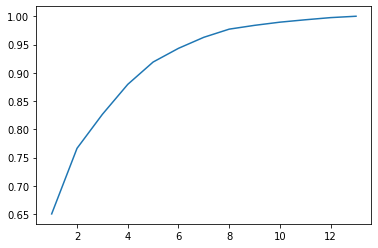

In [410]:
import matplotlib.pyplot as plt
plt.plot(range(1,14),cumsum)

In [422]:
pca=PCA(n_components=7)

In [423]:
X_reduced=pca.fit_transform(X_train)

In [424]:
X_reduced_df=pd.DataFrame(X_reduced,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7'])

In [425]:
X_reduced_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,1.566795,-0.593651,0.217845,-0.296519,-0.068165,0.148673,-0.055063
1,-1.047498,0.011730,0.042917,-0.264720,-0.000380,0.019978,-0.187684
2,-0.289535,0.718037,0.366544,0.219293,0.466756,-0.207091,0.035948
3,2.216708,0.052702,0.571878,0.102810,0.055012,-0.485767,0.174375
4,-0.905562,-0.027025,-0.228917,0.349602,-0.319761,0.093888,-0.134978
...,...,...,...,...,...,...,...
1255,-1.082213,0.132609,0.142939,-0.406494,0.194536,0.178521,0.236763
1256,0.931564,-1.262654,-0.162993,-0.514268,-0.002758,-0.082363,0.277513
1257,-0.966545,-0.001492,-0.061759,-0.067498,-0.076969,0.247191,-0.061695
1258,-0.320085,-0.721685,0.259203,-0.036642,-0.034916,-0.199717,-0.150371


In [426]:
test.shape

(1350, 13)

In [427]:
test_reduced=pca.fit_transform(test)

In [428]:
test_reduced_df=pd.DataFrame(test_reduced,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7'])

In [328]:
test_reduced_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,2.007741,0.123091,0.814743,-0.498785,-0.063434,-0.182301,-0.098489
1,-1.207254,0.046495,0.134796,-0.437195,-0.221387,-0.228483,-0.081553
2,0.771843,0.123844,0.110384,-0.672663,0.260711,-0.312531,-0.055630
3,0.916708,0.082463,-0.049786,-0.299178,0.315822,-0.381680,-0.018928
4,-0.963208,-0.042470,-0.020914,-0.097716,0.215314,-0.371197,-0.276003
...,...,...,...,...,...,...,...
1345,2.529369,0.254421,0.022926,-0.747290,-0.168572,-0.386890,-0.094327
1346,-1.127958,0.023491,0.138694,-0.452234,0.055933,-0.196041,-0.166117
1347,-1.820614,0.743584,-0.256326,-0.151462,-0.064902,-0.393114,-0.048182
1348,0.933118,-0.729482,1.128748,-0.217538,0.219166,-0.112707,-0.115002


In [301]:
from sklearn.ensemble import VotingRegressor

In [302]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import GridSearchCV

In [303]:
best_models = [
    ('rf', RandomForestRegressor(min_samples_split=3, n_estimators=120)),
    ('GBR', GradientBoostingRegressor(learning_rate=0.09, loss='huber', n_estimators=130)),
    ('ET', ExtraTreesRegressor(n_estimators=90))
]


In [304]:
voting_rg=VotingRegressor(best_models)

In [429]:
voting_rg.fit(X_reduced_df,y_train)

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(min_samples_split=3,
                                                   n_estimators=120)),
                            ('GBR',
                             GradientBoostingRegressor(learning_rate=0.09,
                                                       loss='huber',
                                                       n_estimators=130)),
                            ('ET', ExtraTreesRegressor(n_estimators=90))])

In [430]:
from sklearn.model_selection import cross_val_score,KFold

In [432]:
kfold=KFold(n_splits=5)
score=cross_val_score(voting_rg,X_reduced_df,y_train,cv=kfold,scoring='neg_mean_absolute_error')
-score

array([19511.21304318, 18122.37489475, 18349.5391212 , 17674.89957131,
       19638.9621449 ])

In [373]:
from sklearn.model_selection import GridSearchCV

In [295]:
from sklearn.ensemble import RandomForestRegressor

# 모델 선언
rd_clf= RandomForestRegressor()

# 모델 학습
rd_clf.fit(X_train,y_train)

RandomForestRegressor()

In [296]:
rd_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [297]:
score=cross_val_score(rd_clf,X_train,y_train,cv=kfold,scoring='neg_mean_absolute_error')

In [298]:
-score

array([17288.76583466, 16376.54354497, 15690.90381763, 16451.72479375,
       17898.9769709 ])

In [433]:
y_pred=voting_rg.predict(test_reduced_df)

In [434]:
y_pred = y_pred.astype('int')

In [435]:
y_pred

array([325263, 125177, 180895, ..., 104881, 235066, 135893])

In [436]:
submission['target']=y_pred

In [437]:
submission

,id,target
0,1,325263
1,2,125177
2,3,180895
3,4,203277
4,5,136524
...,...,...
1345,1346,344392
1346,1347,120874
1347,1348,104881
1348,1349,235066


In [438]:
submission.to_csv('house-submit.csv',index=False)